<a href="https://colab.research.google.com/github/SlickMik/ensf692Project/blob/main/ENSF_692_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 2

Autosaving every 2 seconds


# ESNF 692 Project
### Group # : 4
##### Authors : Danish Shahid () | Muhammad Ibrahim Khan ()
---

This notebook describes the correlation of asset classes - Oil, Gold, and S&P500 for a user selected time range

---

Importing Libraries

In [2]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates

# Dataset Selection

Downloading Kaggle Datasets

In [3]:
# Download latest dataset versions
gold_dataset_path = kagglehub.dataset_download("faisaljanjua0555/daily-gold-price-historical-dataset")

oil_dataset_path = kagglehub.dataset_download("guillemservera/fuels-futures-data")

sp_dataset_path = kagglehub.dataset_download("youcanttouchthis/s-p-500-dataset")

100%|██████████| 87.0k/87.0k [00:00<00:00, 79.1MB/s]

Extracting files...


100%|██████████| 1.21M/1.21M [00:00<00:00, 53.7MB/s]

Extracting files...


100%|██████████| 179k/179k [00:00<00:00, 85.7MB/s]

Extracting files...


# Dataset Creation

* Reading Dataset to Pandas<br/>
* Dropping unnecessary columns<br/>
* Setting index to Date<br/>
* Parsing Date

In [4]:
# read csv files into pandas
gold_dataset = pd.read_csv(gold_dataset_path + f'/gold.csv', index_col='Date', parse_dates=True)

oil_dataset = pd.read_csv(oil_dataset_path + f'/all_fuels_data.csv', index_col='date', parse_dates=True)

sp_dataset = pd.read_csv(sp_dataset_path + f'/spy.csv', index_col='Date', parse_dates=True)

Gold Dataset
* Dropping Columns
* Renaming Columns

Describing Gold Dataset

In [5]:
gold_dataset = gold_dataset.drop(columns='Currency').rename(columns = {c : f'Gold_{c}' for c in gold_dataset.columns})
gold_dataset.head(3)

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Volume
Date,,,,,
2000-01-04,289.5,289.5,280.0,283.7,21621
2000-01-05,283.7,285.0,281.0,282.1,25448
2000-01-06,281.6,282.8,280.2,282.4,19055


Oil Dataset
* Dropping Columns
* Reorganizing Columns
* Renaming Columns
* Cleaning Columns

Describing Oil Dataset

In [6]:
oil_dataset = oil_dataset[oil_dataset['commodity'].str.lower().str.fullmatch('crude oil')]
oil_dataset = oil_dataset.drop(columns=['ticker', 'commodity'])
oil_dataset.rename_axis(index={'date':'Date'}, inplace=True)
oil_dataset.columns = oil_dataset.columns.str.capitalize()

oil_dataset = (
    oil_dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
    .rename(columns={c : f'Oil_{c.title()}' for c in oil_dataset.columns})
)
oil_dataset.head(3)

,Oil_Open,Oil_High,Oil_Low,Oil_Close,Oil_Volume
Date,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,44601


S&P 500 Dataset
* Dropping Columns
* Renaming Columns

Describing S&P 500 Dataset

In [7]:
sp_dataset = sp_dataset.drop(columns='Adj Close').rename(columns = {c : f'S&P500_{c}' for c in sp_dataset.columns})
sp_dataset.head(3)

,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Close,S&P500_Volume
Date,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,201300


Join Datasets

In [8]:
close_cols = ['S&P500_Close', 'Gold_Close', 'Oil_Close']
assets_df = sp_dataset[[close_cols[0]]].join(gold_dataset[[close_cols[1]]], how='outer').join(oil_dataset[[close_cols[2]]], how='outer')
assets_df.head(3)

,S&P500_Close,Gold_Close,Oil_Close
Date,,,
1993-01-29,43.93750,NaN,NaN
1993-02-01,44.25000,NaN,NaN
1993-02-02,44.34375,NaN,NaN


Drop Duplicated Columns If Any

In [9]:
if assets_df.columns.duplicated().any():
  assets_df = assets_df.T.drop_duplicates().T

Set Hierarchical Index on Rows

In [10]:
assets_df = assets_df.set_index(
    pd.MultiIndex.from_arrays(
        [assets_df.index.year,assets_df.index.month, assets_df.index.day], names=['Year', 'Month', 'Day']
        )
    )
assets_df.head(3)

S&P500_Close  Gold_Close  Oil_Close
Year Month Day                                     
1993 1     29       43.93750         NaN        NaN
     2     1        44.25000         NaN        NaN
           2        44.34375         NaN        NaN

---

# User Entry

In [11]:
print("Enter a start and end date between the range of 2000-08-23 & 2020-12-24 or enter 'n' to exit program")
min_date = pd.to_datetime('2000-08-23')
max_date = pd.to_datetime('2020-12-24')
status = True;

while status:
    try:
        start_date = pd.to_datetime(input('Enter the start date (e.g YYYY-MM-DD): '))
        end_date = pd.to_datetime(input('Enter the end date (e.g YYYY-MM-DD): '))
        rolling_period = int(input("Enter rolling period (e.g 20): "))
        if not (min_date <= start_date <= max_date):
            raise ValueError(f"Start date must be between {min_date.date()} and {max_date.date()}")
        if not (min_date <= end_date <= max_date):
            raise ValueError(f"End date must be between {min_date.date()} and {max_date.date()}")
        if start_date > end_date:
            raise ValueError("Start date must be before or equal to end date.")
        if rolling_period > 200:
            raise ValueError("Rolling period must be lower than 200")
        break
    except Exception as e:
        print(f"Invalid input: {e}")


Enter a start and end date between the range of 2000-08-23 & 2020-12-24 or enter 'n' to exit program
Enter the start date (e.g YYYY-MM-DD): 2000-08-23
Enter the end date (e.g YYYY-MM-DD): 2020-12-24
Enter rolling period (e.g 20): 20


Slicing Joined Asset Data Frame by Index

In [12]:
range_asset_df = assets_df.loc[(start_date.year, start_date.month, start_date.day):(end_date.year, end_date.month, end_date.day)]
range_asset_df.head(3)

S&P500_Close  Gold_Close  Oil_Close
Year Month Day                                     
2000 8     23      150.84375       275.7  32.049999
           24      151.31250       277.5  31.629999
           25      151.25000       278.6  32.049999

---

# Analysis & Calculations

* Rolling Window SMA on price
* Rolling Window Correlation - pct change()
* Beta - returns - pct change()
* Seasonality heatmap - average returns
* Alpha? - returns

### Simple Moving Average (Normalized)

In [13]:
sma_cols = {f'{x}' : f"""{x.replace('_Close', '')}_{rolling_period}-day_SMA""" for x in close_cols}
sma_df = range_asset_df[[*sma_cols.keys()]].rolling(window=rolling_period).mean().rename(columns = sma_cols).bfill()
sma_df /= sma_df.iloc[0]
sma_df.head(3)

S&P500_20-day_SMA  Gold_20-day_SMA  Oil_20-day_SMA
Year Month Day                                                    
2000 8     23                 1.0              1.0             1.0
           24                 1.0              1.0             1.0
           25                 1.0              1.0             1.0

### Price Change

In [14]:
perc_cols = {f'{x}' : f"""{x.replace('_Close', '')}_%Return""" for x in close_cols}
cum_cols = {f'{x}' : f"""{x.replace('_%Return', '')}_%CumReturn""" for x in perc_cols.values()}
range_asset_df = pd.concat([range_asset_df[[*perc_cols.keys()]],
                            range_asset_df[[*perc_cols.keys()]]
                            .pct_change(fill_method=None).multiply(100)
                            .rename(columns=perc_cols)#.bfill()
                            ], axis=1)
range_asset_df = pd.concat([range_asset_df,
                            range_asset_df[[*perc_cols.values()]]
                            .cumsum()
                            .rename(columns=cum_cols)
                            ], axis=1)
range_asset_df.head(3)

S&P500_Close  Gold_Close  Oil_Close  S&P500_%Return  \
Year Month Day                                                        
2000 8     23      150.84375       275.7  32.049999             NaN   
           24      151.31250       277.5  31.629999        0.310752   
           25      151.25000       278.6  32.049999       -0.041305   

                Gold_%Return  Oil_%Return  S&P500_%CumReturn  Gold_%CumReturn  \
Year Month Day                                                                  
2000 8     23            NaN          NaN                NaN              NaN   
           24       0.652884    -1.310453           0.310752         0.652884   
           25       0.396396     1.327854           0.269447         1.049280   

                Oil_%CumReturn  
Year Month Day                  
2000 8     23              NaN  
           24        -1.310453  
           25         0.017401

### Monthly Returns Correlation

In [15]:
corr_cols = {f'{x}' : f"""{x.replace('_%Return', '')}_Corr""" for x in perc_cols.values()}
corr_df = range_asset_df[[*corr_cols.keys()]].groupby(level=[1]).corr().unstack()
corr_df.columns = [f"""{"_".join(a).replace('_%Return', '')}_Corr""" for a in corr_df.columns.to_flat_index()]
corr_df = corr_df[['S&P500_Gold_Corr', 'S&P500_Oil_Corr', 'Gold_Oil_Corr']]
corr_df.head(3)

,S&P500_Gold_Corr,S&P500_Oil_Corr,Gold_Oil_Corr
Month,,,
1,-0.039107,0.312320,0.182149
2,-0.047966,0.166695,0.057820
3,0.068569,0.332126,0.252484


### Average Monthly Returns

In [18]:
monthlyReturns = range_asset_df[[*perc_cols.values()]].groupby(['Year', 'Month']).sum().groupby('Month').mean()
monthlyReturns.head(3)

,S&P500_%Return,Gold_%Return,Oil_%Return
Month,,,
1,0.404372,3.203198,0.771125
2,-0.204774,1.120590,3.058619
3,0.326490,-0.174139,0.100080


### Beta

In [60]:
beta_df = monthlyReturns.cov().iloc[0]/monthlyReturns.var().iloc[0]
beta_df

,S&P500_%Return
S&P500_%Return,1.000000
Gold_%Return,0.019326
Oil_%Return,-2.793717


### Alpha

In [36]:
alpha_df = monthlyReturns.mean() - beta_df * monthlyReturns['S&P500_%Return'].mean()
alpha_df

,0
S&P500_%Return,1.110223e-16
Gold_%Return,8.526212e-01
Oil_%Return,1.114315e+00


---

# Export & Matplotlib

SMA Plot

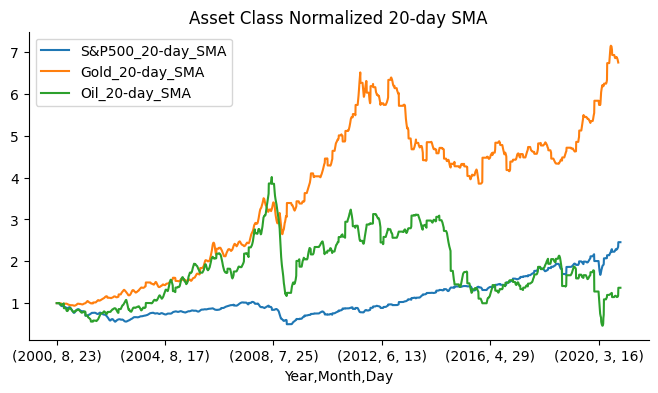

In [37]:
sma_df.plot(kind='line', figsize=(8, 4), title=f'Asset Class Normalized {rolling_period}-day SMA')
plt.gca().spines[['top', 'right']].set_visible(False)

daily returns 2008

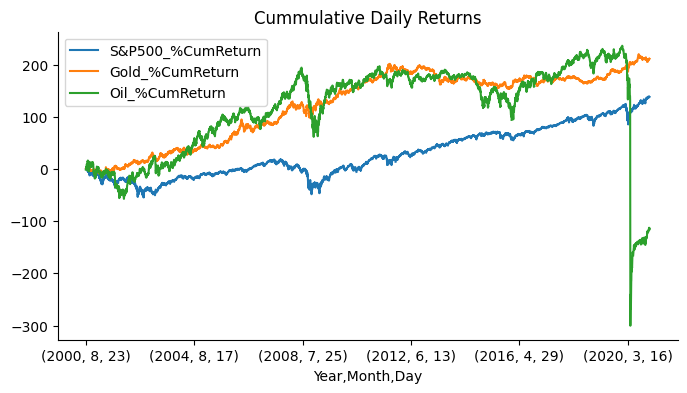

In [38]:
range_asset_df[[*cum_cols.values()]].plot(kind='line', figsize=(8, 4), title=f'Cummulative Daily Returns')
plt.gca().spines[['top', 'right']].set_visible(False)

Corr_Plot - bar char level from 0

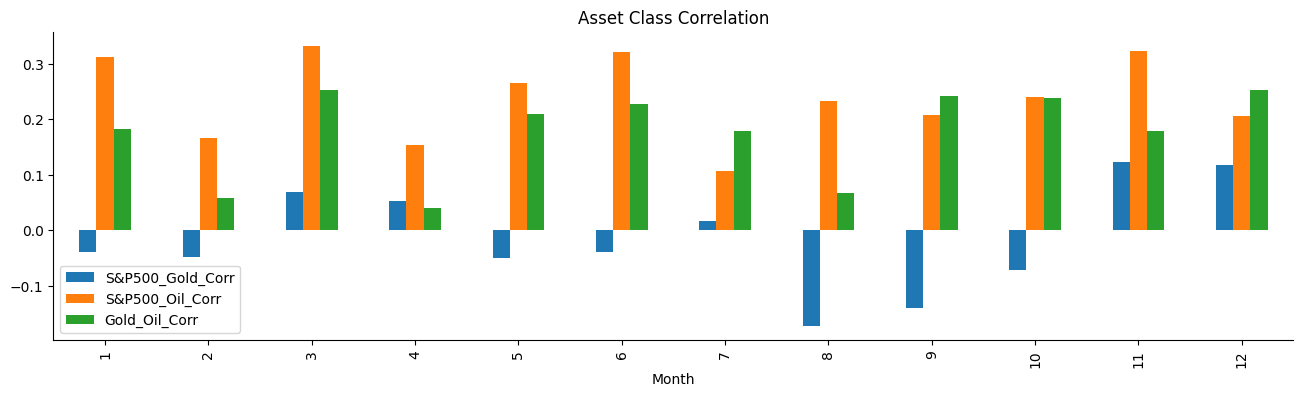

In [39]:
corr_df.plot(kind='bar', figsize=(16, 4), title=f'Asset Class Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

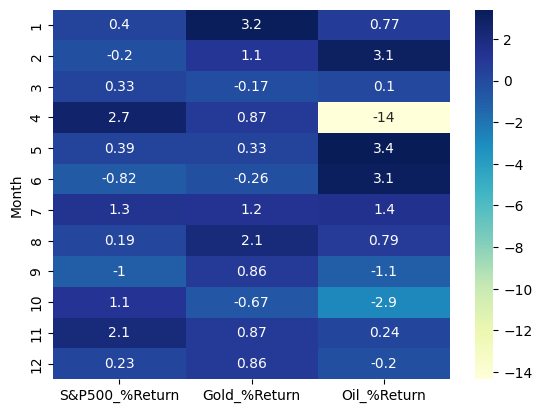

In [40]:
sb.heatmap(monthlyReturns, annot=True, cmap="YlGnBu")
plt.show()

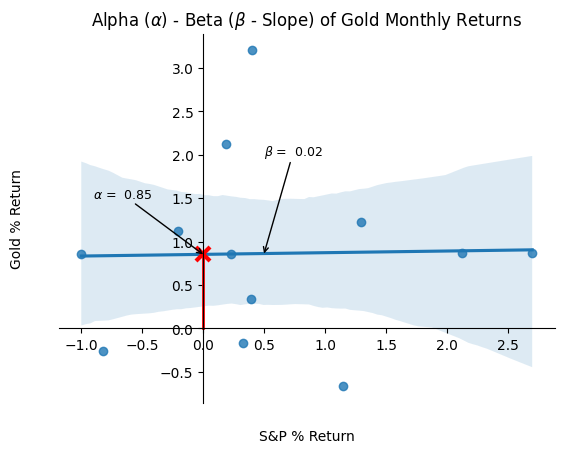

In [96]:
ret_col = 'Gold_%Return'
alpha = alpha_df[ret_col]
beta = beta_df[ret_col]
ax = sb.regplot(x="S&P500_%Return", y=ret_col, data=monthlyReturns)
ax.plot([0, 0], [0, alpha], color='red', linewidth=2)
ax.plot(0, alpha, marker='x', color='red', markersize=10, markeredgewidth=3)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
sb.despine()
ax.set_xlabel('S&P % Return')
ax.set_ylabel('Gold % Return')
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.annotate(
    f'$\\alpha$ = {alpha: .2f}',
    xy=(0, alpha),
    xytext=(-0.9, 1.5),
    textcoords='data',
    color='black',
    fontsize=9,
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1,
        shrinkA=0, shrinkB=0
    )
);

ax.annotate(
    f'$\\beta$ = {beta: .2f}',
    xy=(0.5, alpha + (beta * 0.5)),
    xytext=(0.5, 2),
    textcoords='data',
    color='black',
    fontsize=9,
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1,
        shrinkA=0, shrinkB=0
    )
);
ax.set_title("Alpha ($\\alpha$) - Beta ($\\beta$ - Slope) of Gold Monthly Returns");